In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [3]:
dataset = pd.read_csv('Hitters.csv')
print(dataset.shape)

dataset.head()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
dataset[dataset['Salary'].isna()]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61,1,34,12,14,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N


In [5]:
dataset.dropna(subset = ['Salary'], inplace = True)
dataset.shape

(263, 20)

# The Target Variable

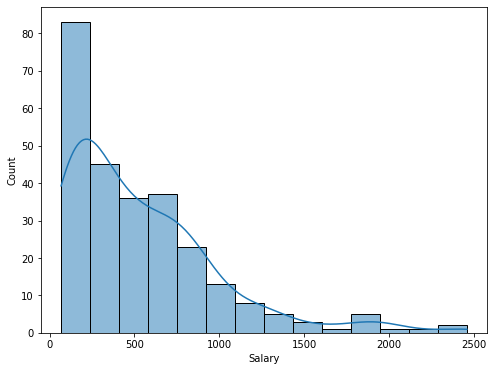

In [6]:
fig = plt.figure(figsize = (8, 6))
sns.histplot(dataset['Salary'], kde = True)

plt.show()

**As we can see, the salary distribution is right skewed. We need to apply suitable transformations to make it better**

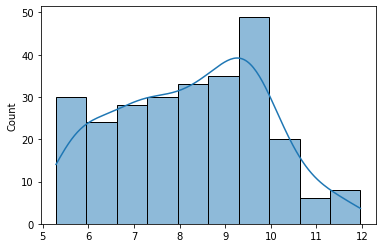

In [7]:
fitted_target, param = stats.yeojohnson(dataset['Salary'])
sns.histplot(fitted_target, kde = True)

plt.show()

<AxesSubplot:xlabel='Salary', ylabel='Count'>

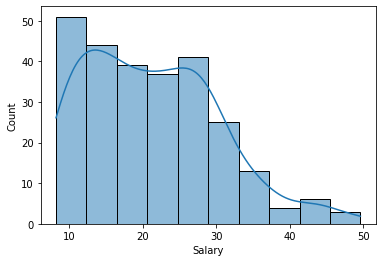

In [8]:
sns.histplot(np.sqrt(dataset['Salary']), kde = True)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

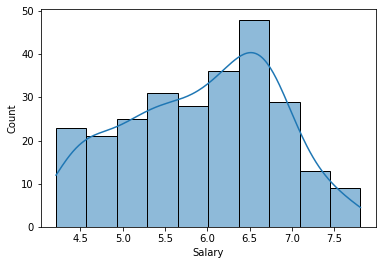

In [9]:
sns.histplot(np.log(dataset['Salary']), kde = True)

**Clearly, log transform is better compared to other transformations**

# The Variable Types

In [10]:
dataset.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [12]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object' and feature != 'Salary']
print('Total number of numerical features: ', len(numerical_features))

print(numerical_features)

Total number of numerical features:  16
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']


In [13]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']
print('Total number of categorical features: ', len(categorical_features))

print(categorical_features)

Total number of categorical features:  3
['League', 'Division', 'NewLeague']


## Numerical Features

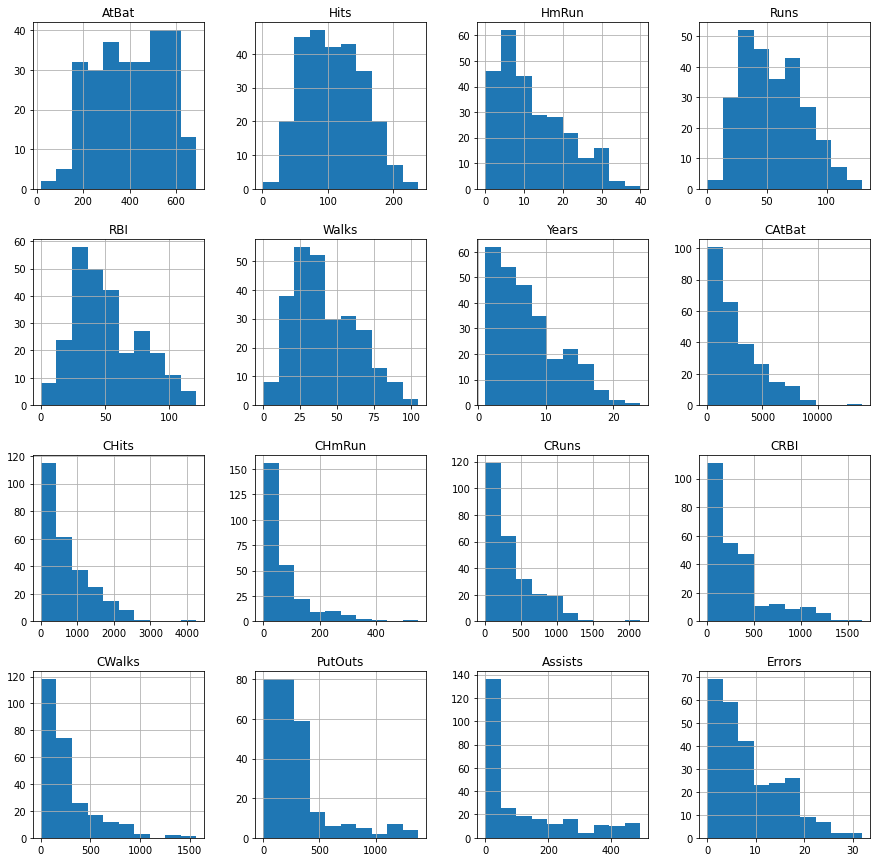

In [14]:
dataset[numerical_features].hist(figsize = (15, 15))

plt.show()

**So many distributions are right skewed. For better model performance, we need to convert these skewed distributions closer to normal distributions.**

### Yeojohnson Transformation

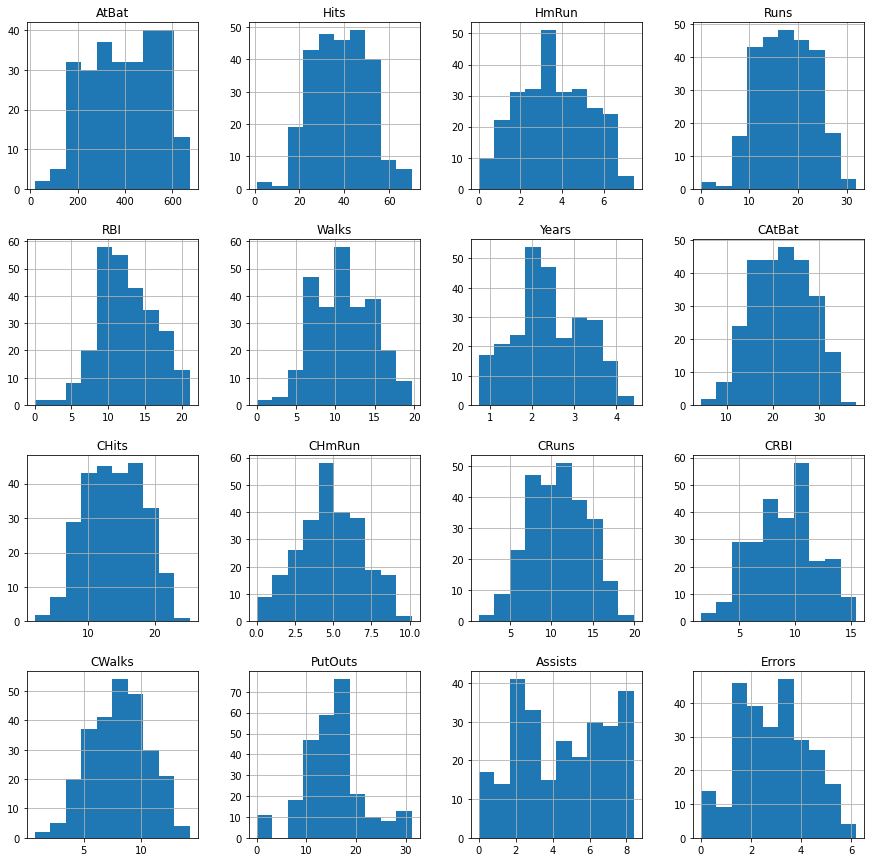

In [15]:
temp_data = dataset.copy()

for feature in numerical_features:
    temp_data[feature], param = stats.yeojohnson(dataset[feature])
    
temp_data[numerical_features].hist(figsize = (15, 15))
plt.show()

**Woah! yeojohnson transformation worked like a gem. As we can see, after applying this transformation, many of our variables are similar to normal distribution.**

**We will take those variables which are suitable for yeojohnson transformation, and let's continue applying other transformations for remaining features.**

**But before applying other transformations to the remaining features, let's see how our variables distributions are changed before and after appylying yeojohnson transformation.**

In [16]:
def plot_before_after(dataset, transformed_dataset, feature_list):
    
    for feature in feature_list:
        plt.figure(figsize = (15, 6))

        # Plotting original feature distribution w.r.t Salary
        plt.subplot(1, 2, 1)
        plt.scatter(dataset[feature], np.log(dataset['Salary']))
        plt.ylabel('Salary')
        plt.xlabel('Original ' + feature)

        # Plotting transformed feature distribution w.r.t Salary
        plt.subplot(1, 2, 2)
        plt.scatter(temp_data[feature], np.log(dataset['Salary']))
        plt.ylabel('Salary')
        plt.xlabel('Transformed ' + feature)
    
    plt.show()

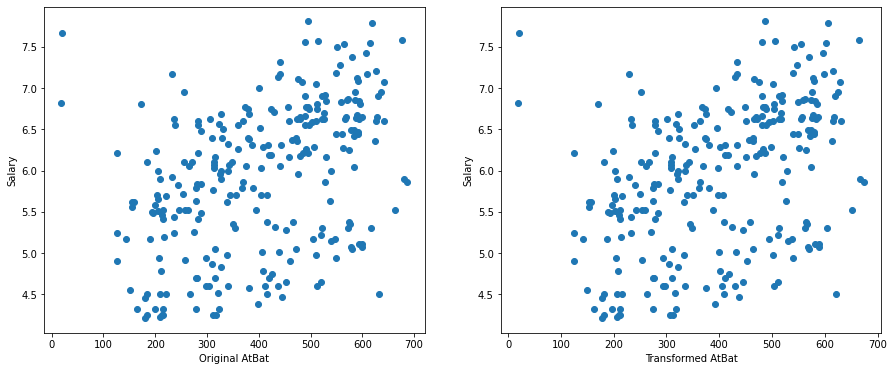

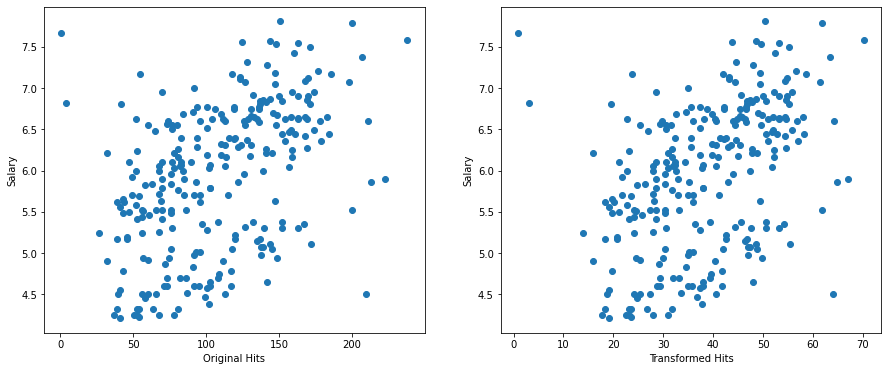

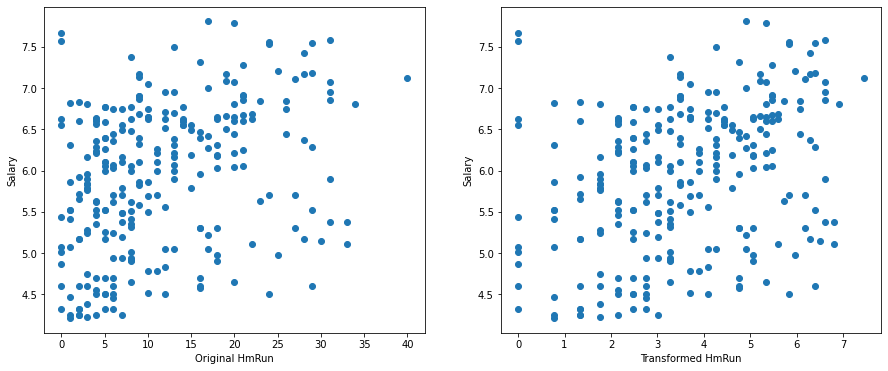

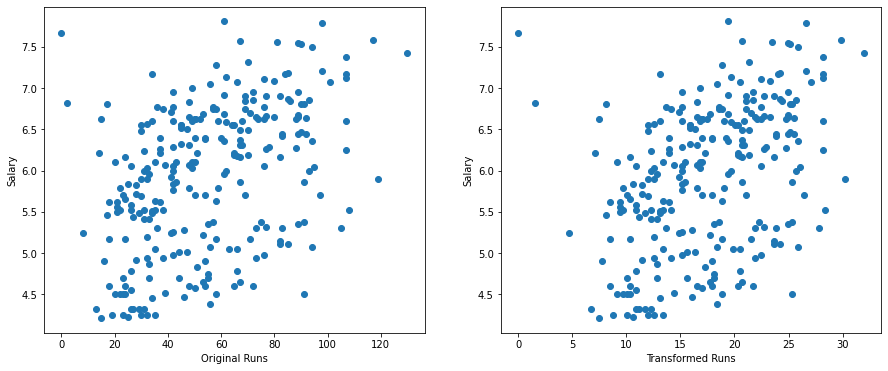

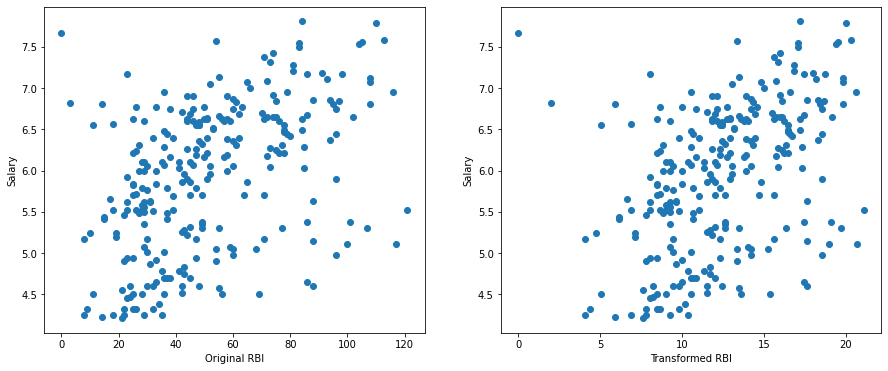

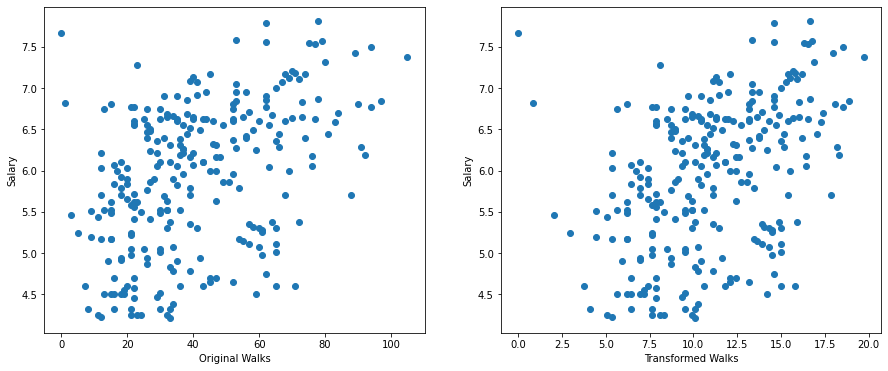

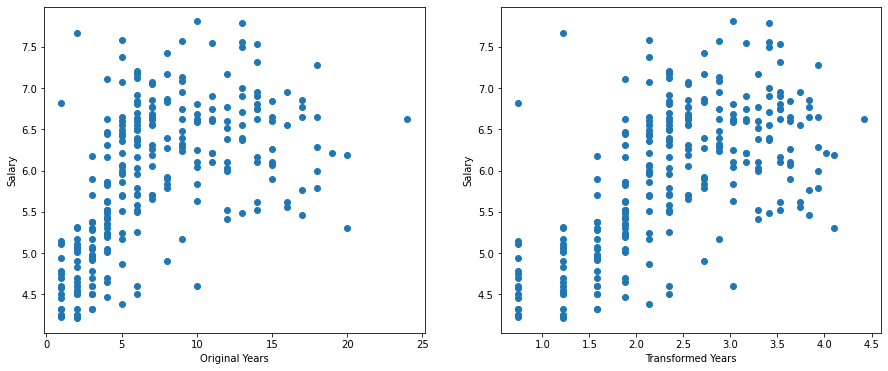

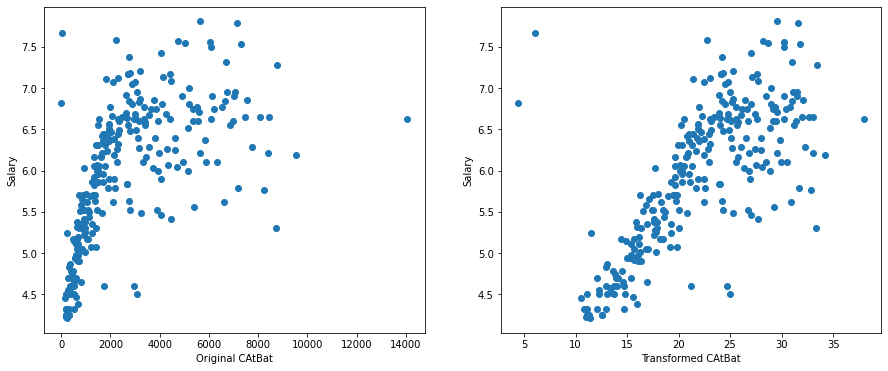

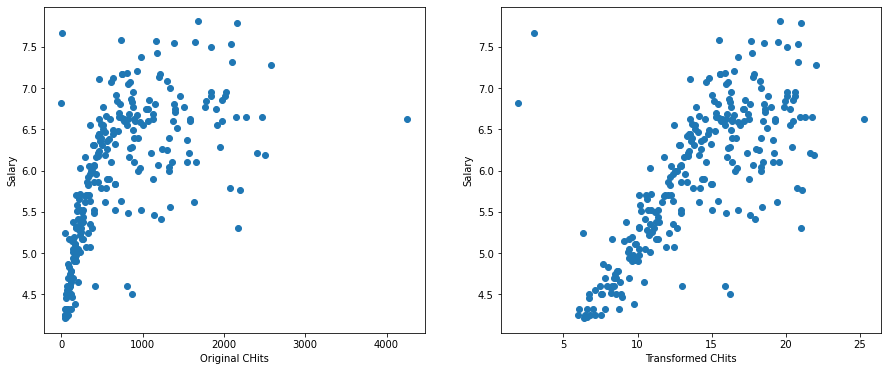

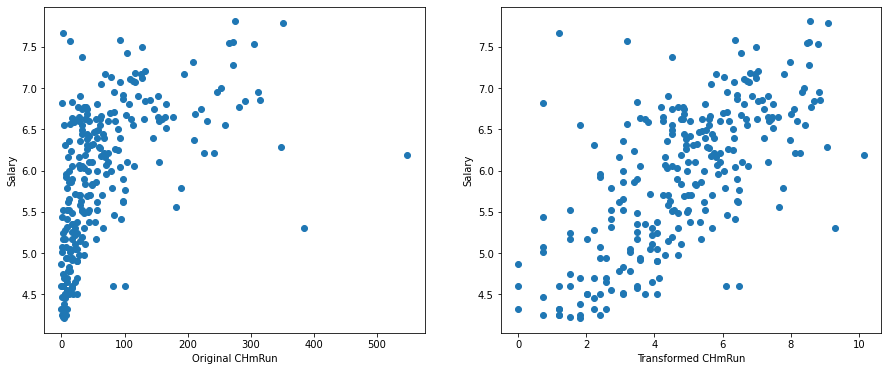

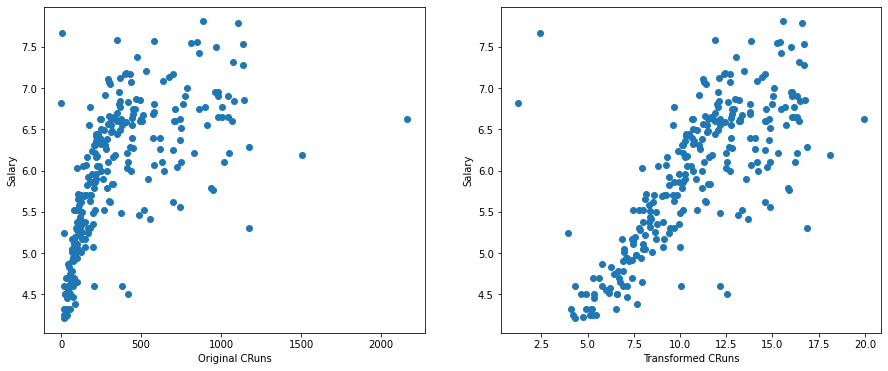

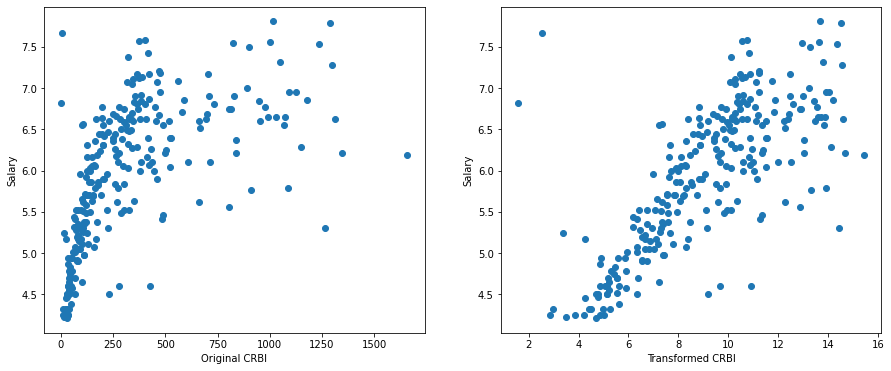

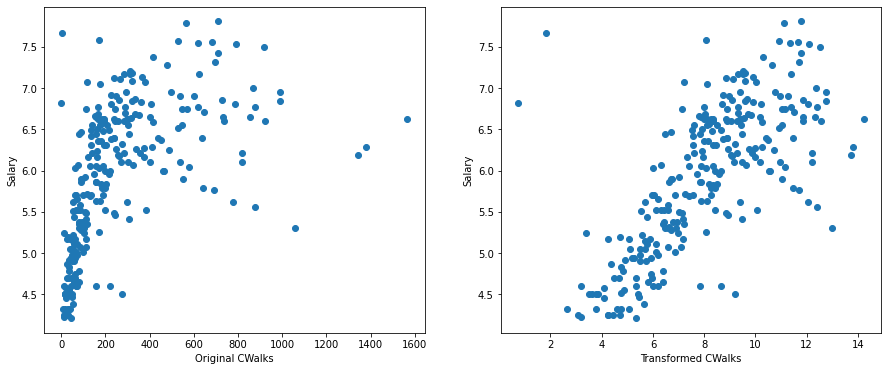

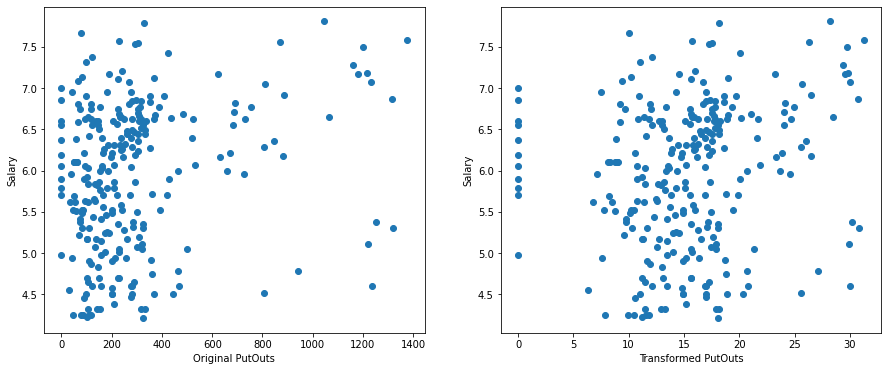

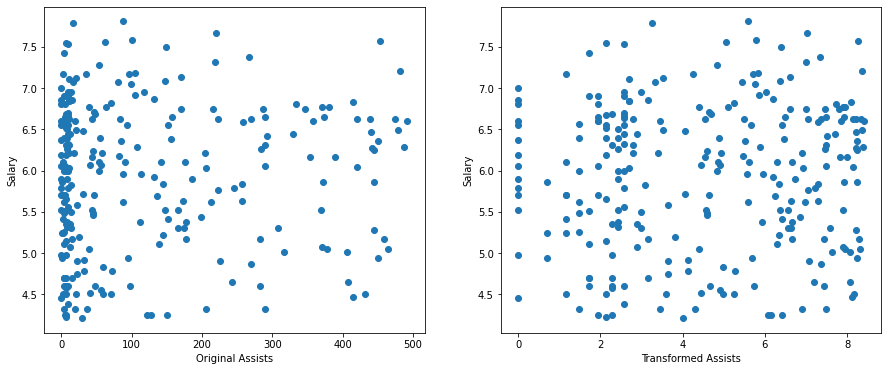

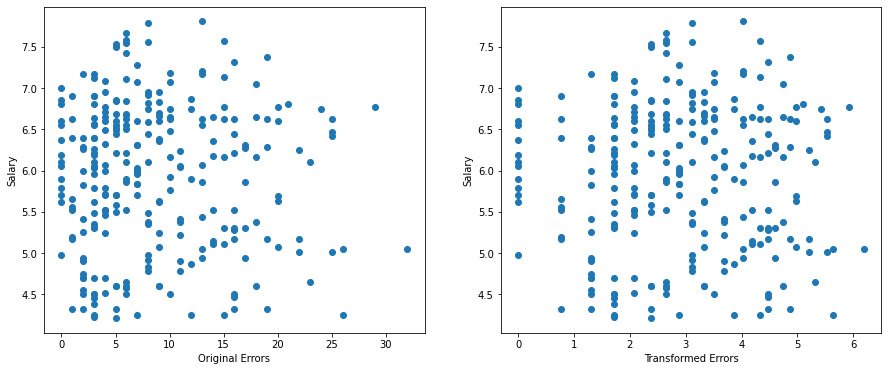

In [17]:
plot_before_after(dataset, temp_data, numerical_features)

In [18]:
np.std(temp_data['Walks']) * 2

7.359912030923356

**Few variables are very well transformed. Yeojohnson transformer worked pretty good...!**

**It is important to look at the distribution of the feature after applying transformations. After applying yeojohnson transformations, many data points tend to be at the center.**

In [19]:
to_yeojohnson = ['AtBat', 'HmRun', 'Runs', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Years', 'Assists']

In [20]:
numerical_features = [feature for feature in numerical_features if feature not in to_yeojohnson]
print('Total number of remaining numerical features: ', len(numerical_features))

print(numerical_features)

Total number of remaining numerical features:  4
['Hits', 'RBI', 'Walks', 'Errors']


### Box-Cox Transformation

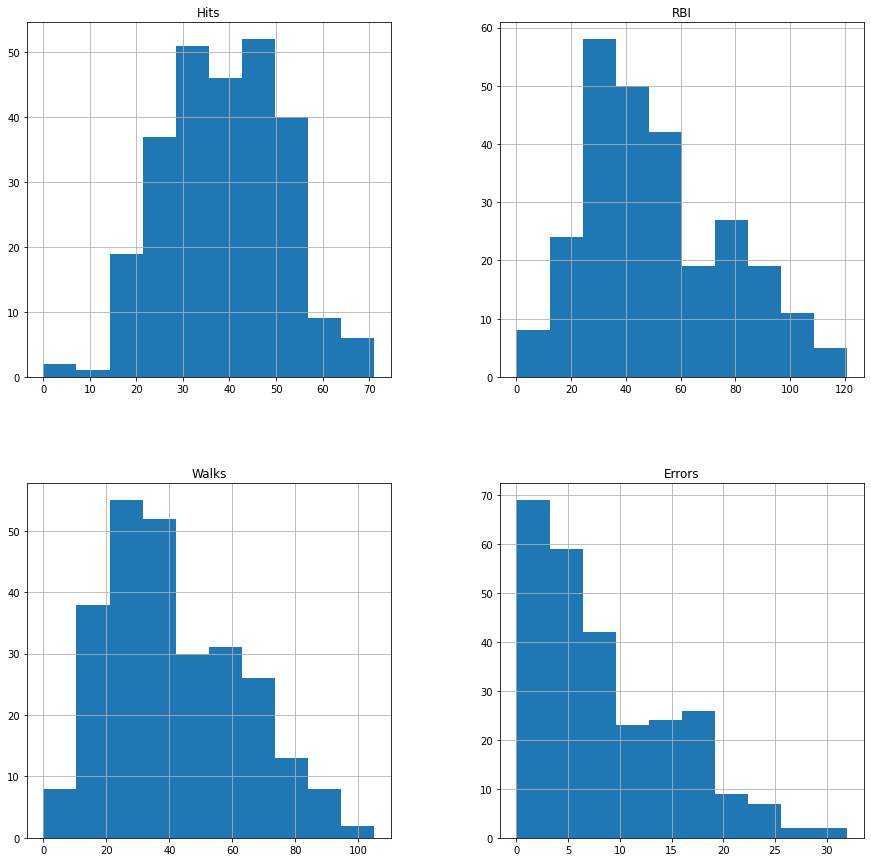

In [21]:
temp_data = dataset[numerical_features].copy()

for feature in numerical_features:
    try:
        temp_data[feature], param = stats.boxcox(dataset[feature])
    except:
        pass

temp_data[numerical_features].hist(figsize = (15, 15))
plt.show()

**Box-Cox transformation works only on the positive data. So, we skip the feature if it has a negative value or a zero instead of printing the error.**

**Box-Cox transformed worked on Hits feature.**

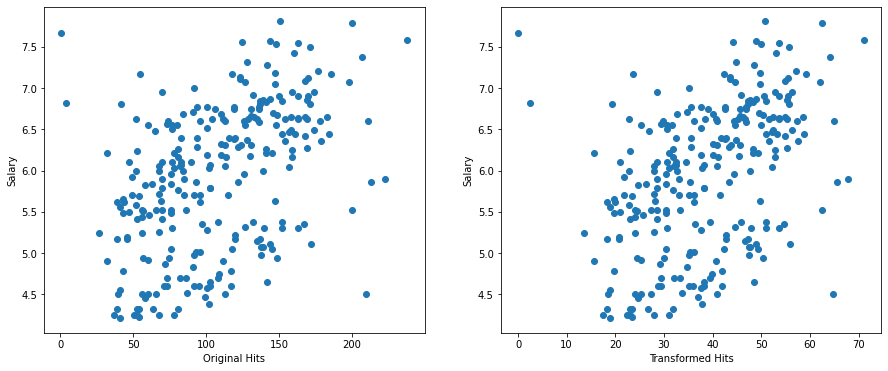

In [22]:
plot_before_after(dataset, temp_data, ['Hits'])

In [23]:
to_boxcox = ['Hits']

In [24]:
numerical_features = [feature for feature in numerical_features if feature not in to_boxcox]
print('Total number of remaining numerical features: ', len(numerical_features))

print(numerical_features)

Total number of remaining numerical features:  3
['RBI', 'Walks', 'Errors']


### Sqrt Transformation

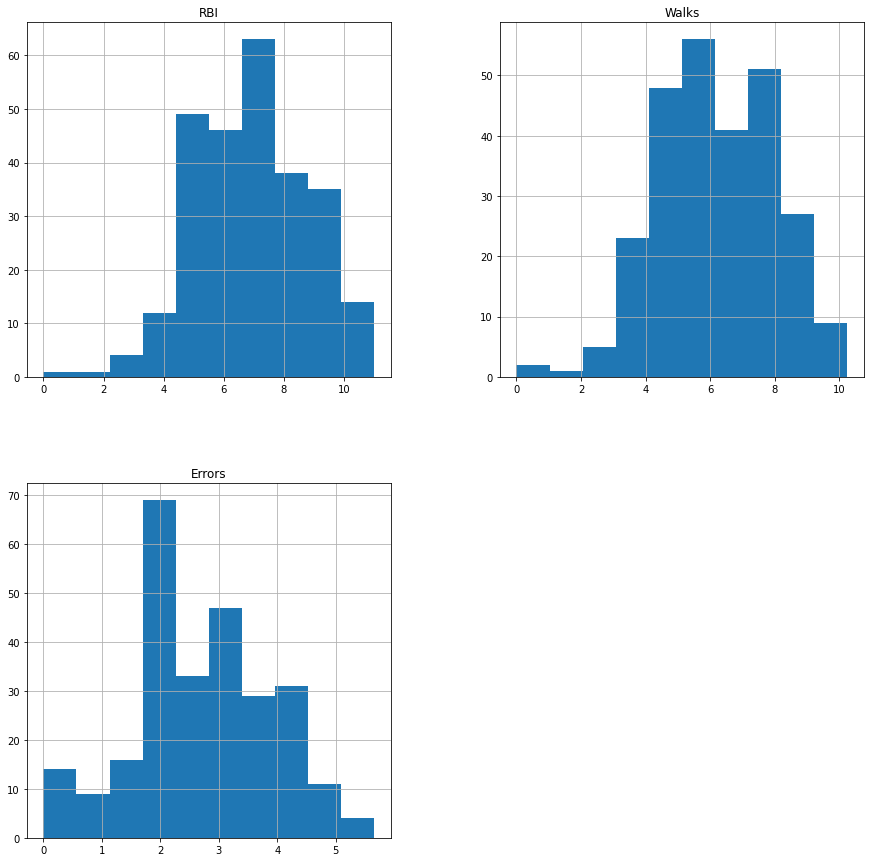

In [25]:
temp_data = dataset[numerical_features].copy()

for feature in numerical_features:
    try:
        temp_data[feature] = np.sqrt(dataset[feature])
    except:
        pass

temp_data[numerical_features].hist(figsize = (15, 15))
plt.show()

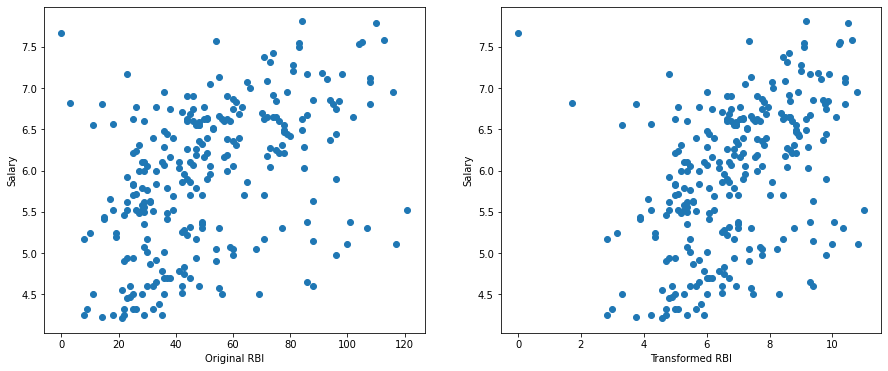

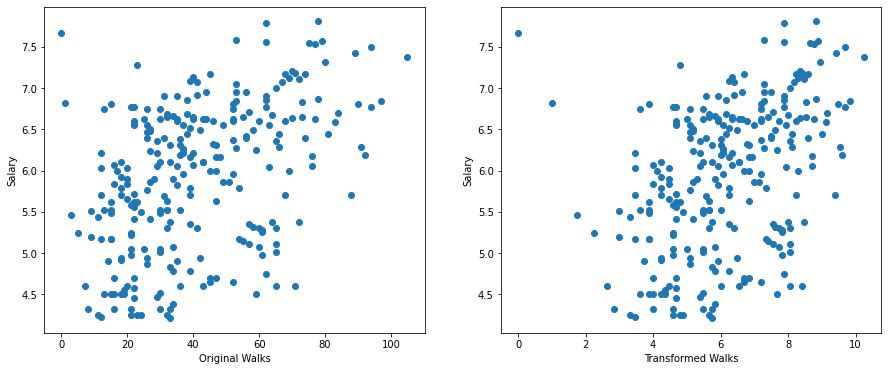

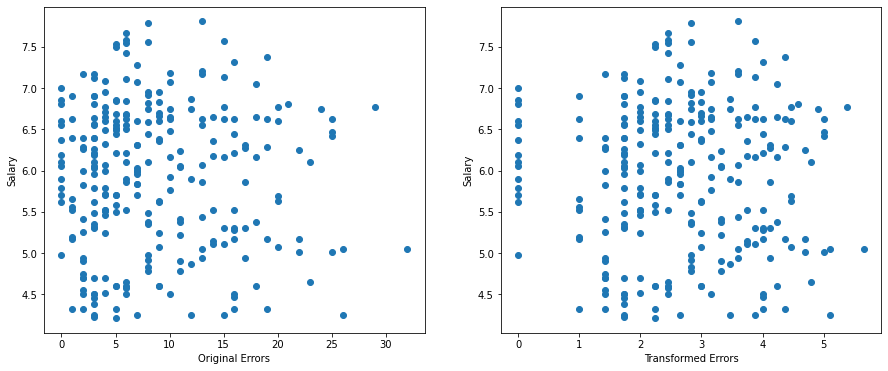

In [26]:
plot_before_after(dataset, temp_data, numerical_features)

In [27]:
to_sqrt = ['RBI', 'Walks', 'Errors']

In [28]:
numerical_features = [feature for feature in numerical_features if feature not in to_sqrt]
print('Total number of remaining numerical features: ', len(numerical_features))

print(numerical_features)

Total number of remaining numerical features:  0
[]


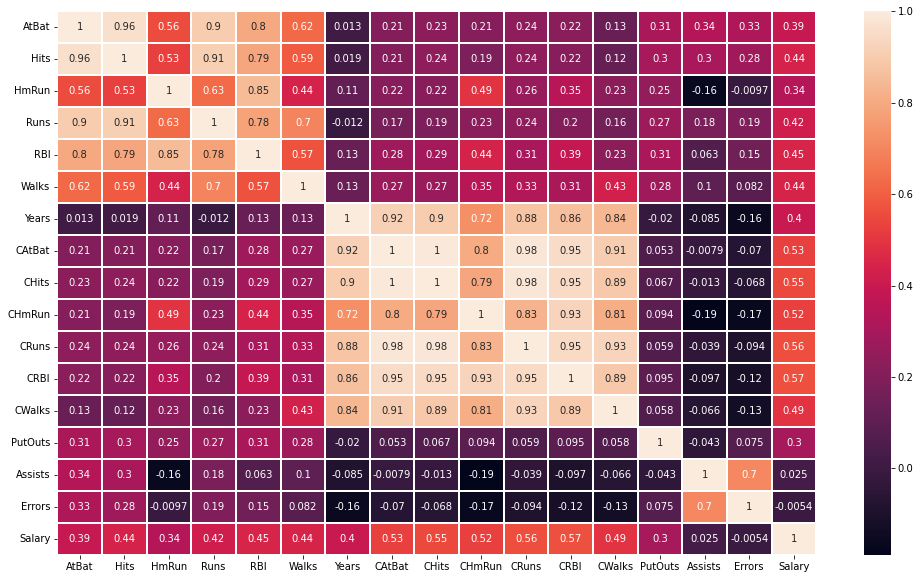

In [29]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object']

fig = plt.figure(figsize = (17, 10))
sns.heatmap(dataset[numerical_features].corr(), annot = True, linewidths = 0.2)

plt.show()

**As we can see there are lot of correlated features, it's better to perform Feature Selection.**

## Outliers

In [40]:
def check_outliers(df, variable):

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

**This methods helps us to analyze single feature with 3 different subplots, namely: Histogram, Q-Q Plot and Boxplot**

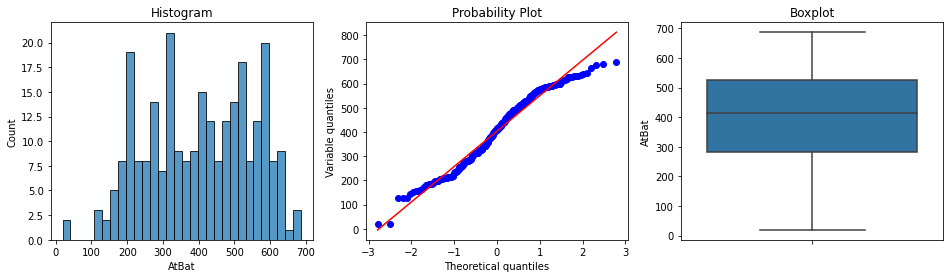

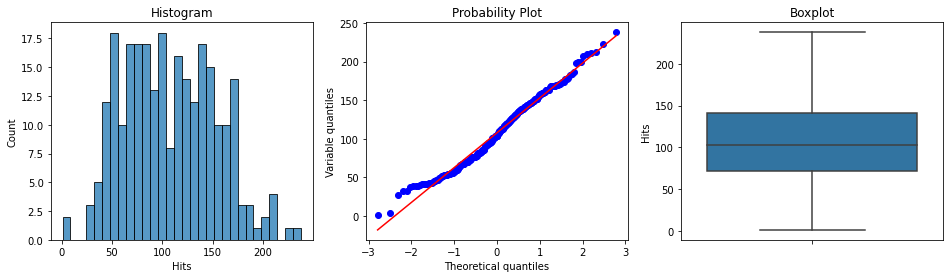

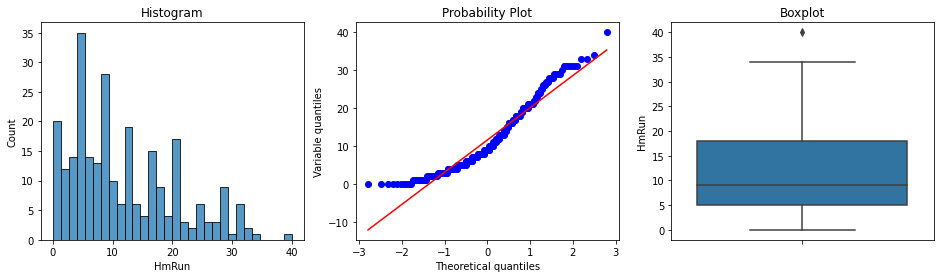

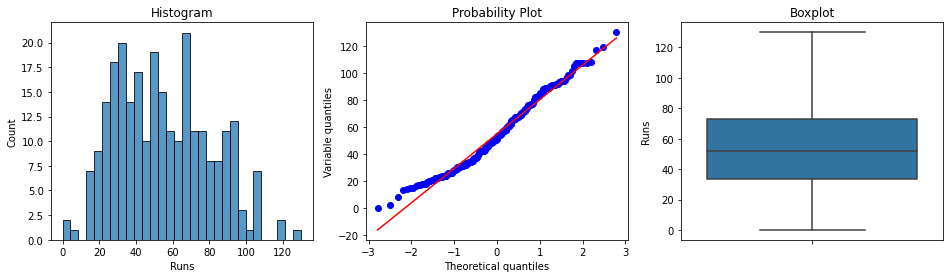

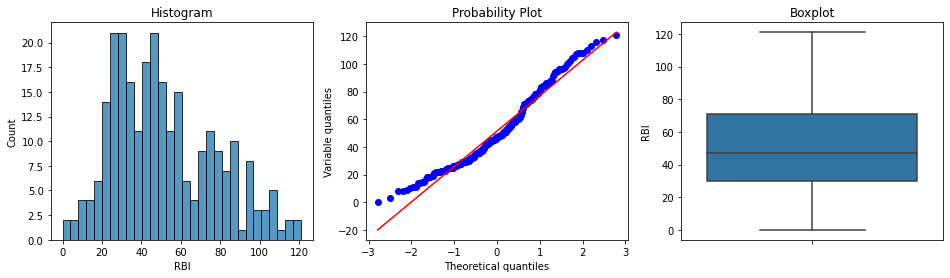

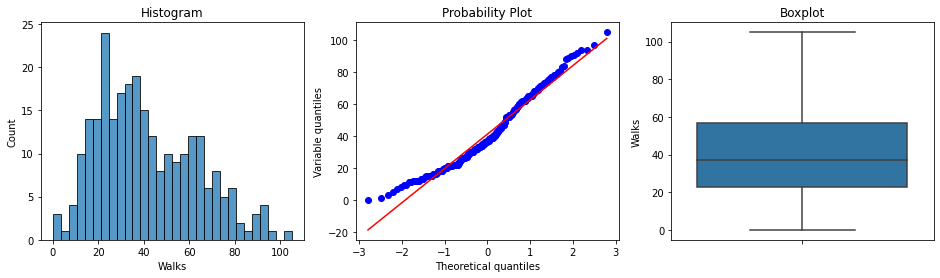

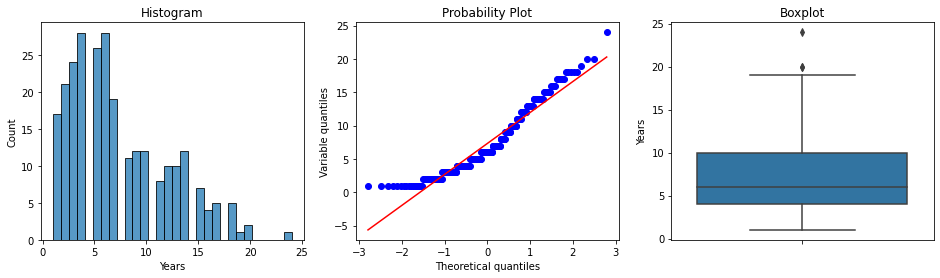

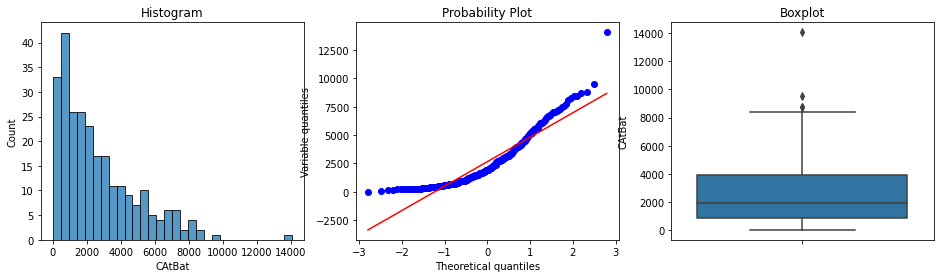

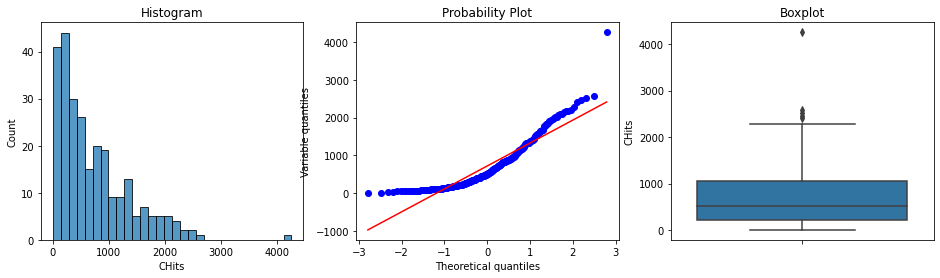

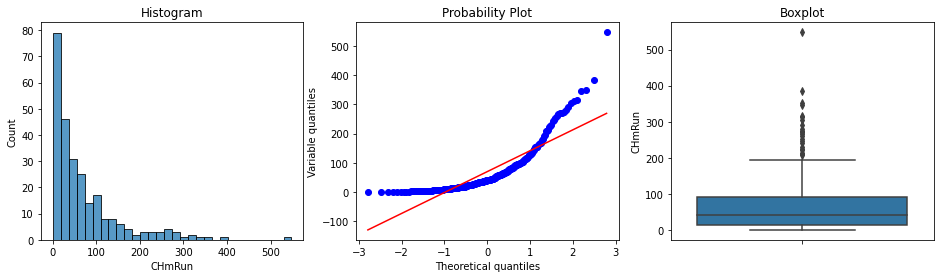

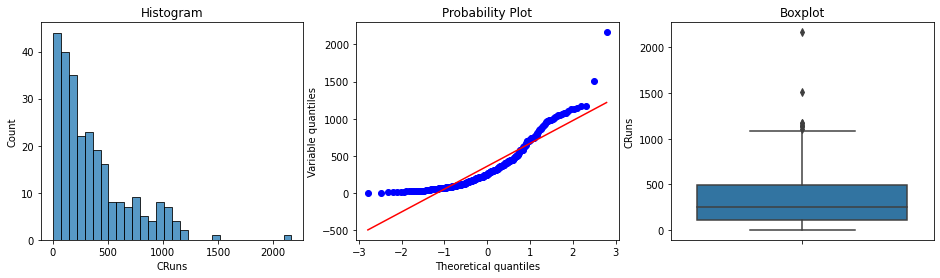

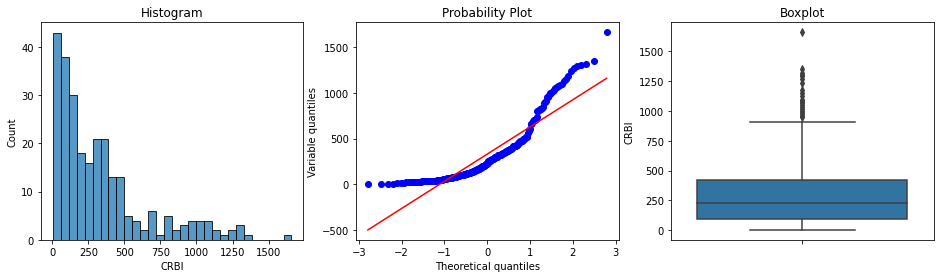

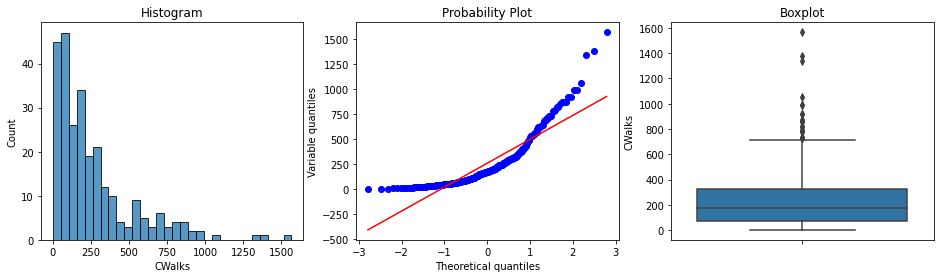

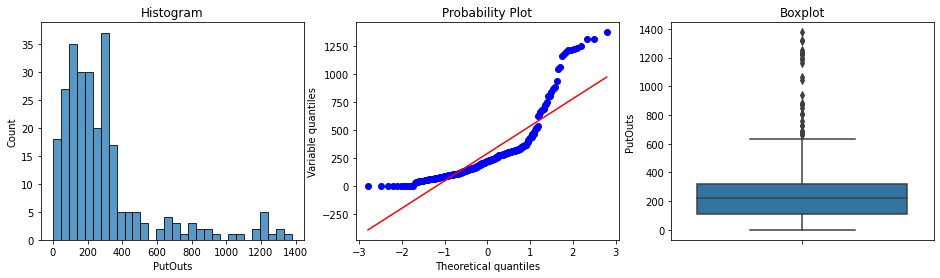

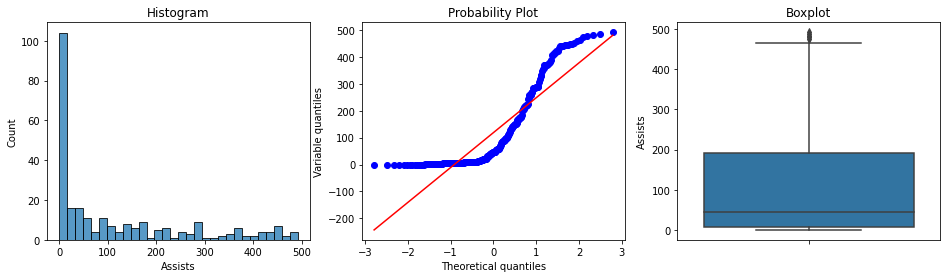

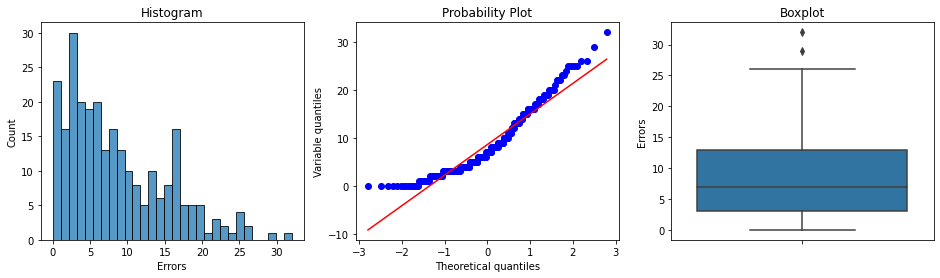

In [31]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object' and feature != 'Salary']

for feature in numerical_features:
    check_outliers(dataset, feature)

**As we can see, few features have many outliers, linear regression is very sensitive to these outliers so we need to handle them to improve our model performance.**

In [32]:
outliers = ['HmRun', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']

In [38]:
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='quantiles', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=0.05,
                          variables=outliers)

windsoriser.fit(dataset)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['HmRun', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns',
                      'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors'])

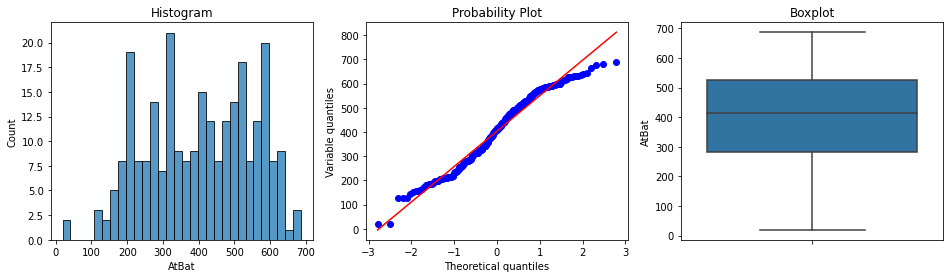

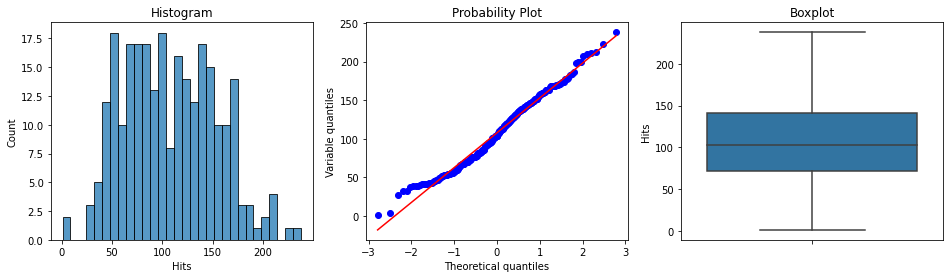

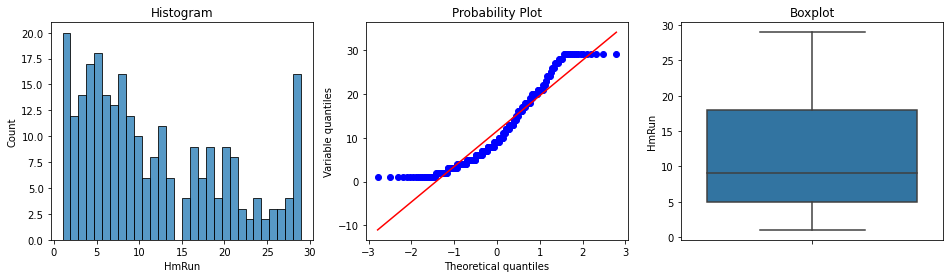

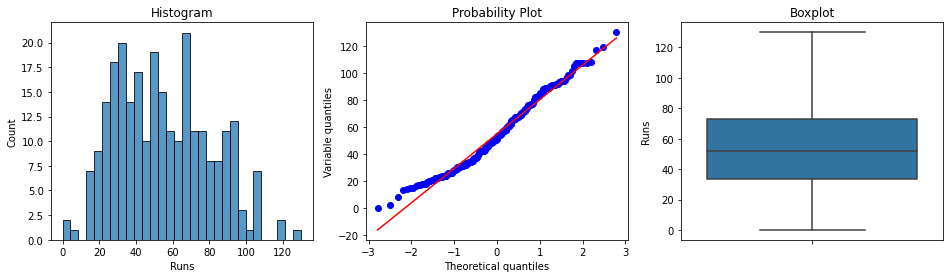

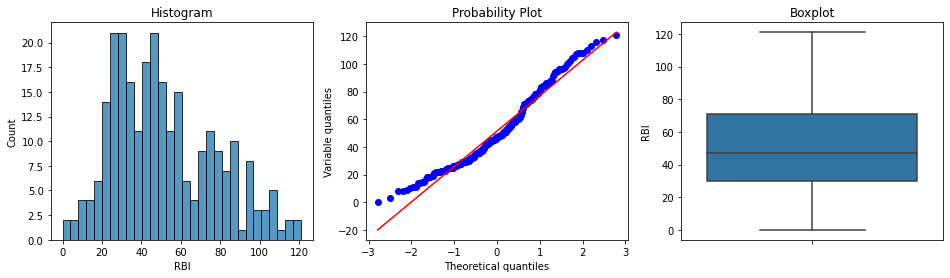

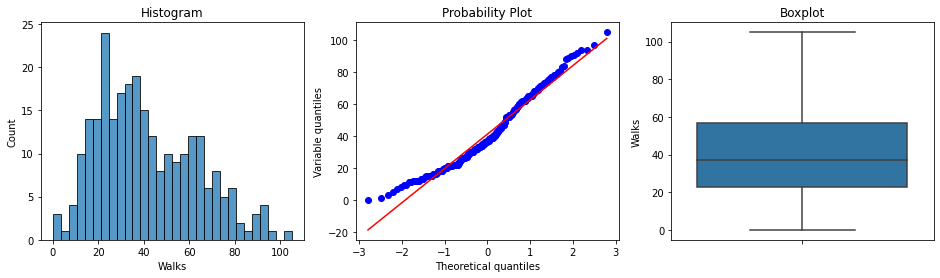

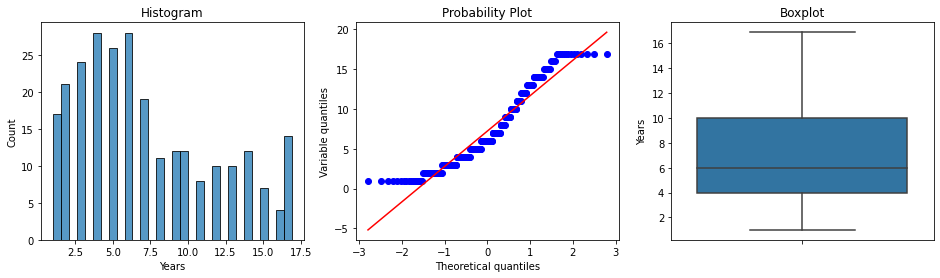

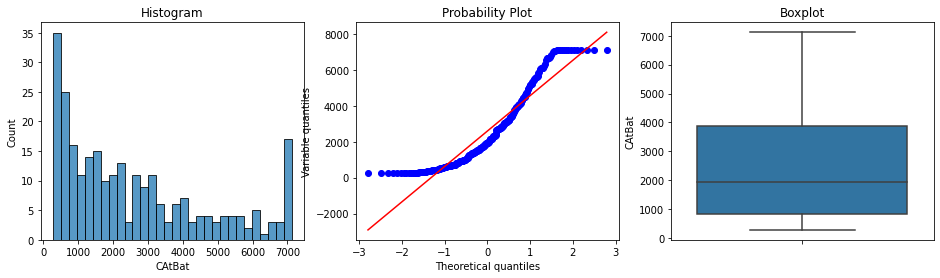

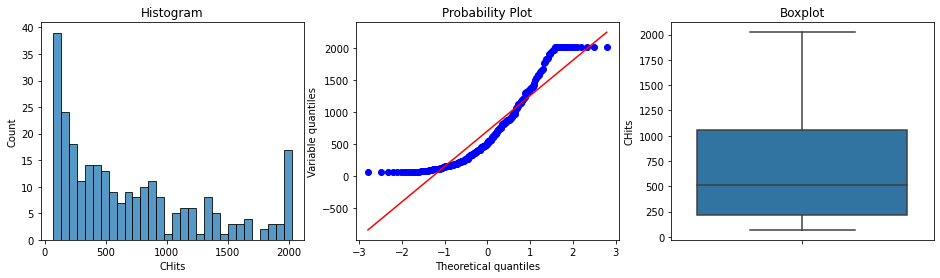

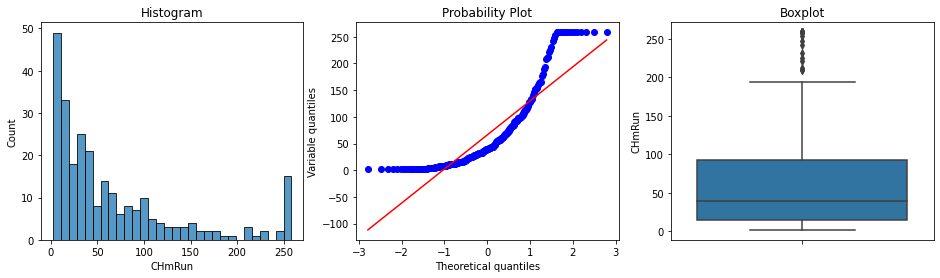

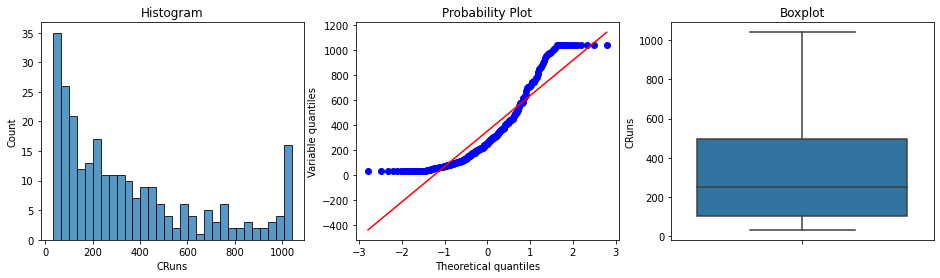

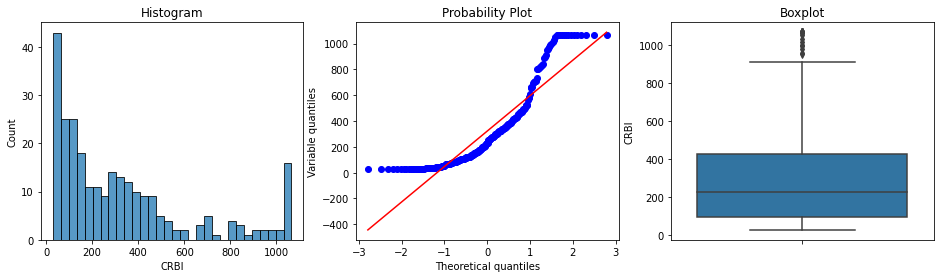

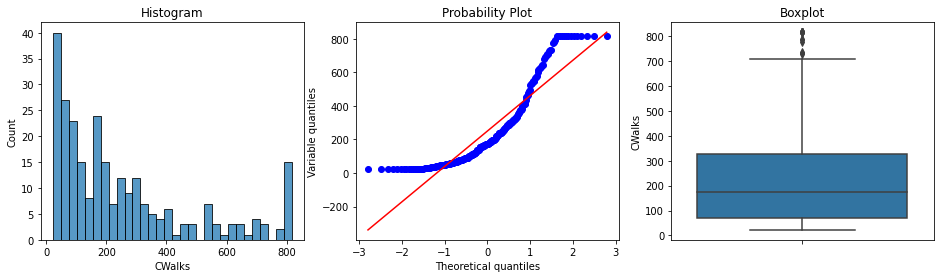

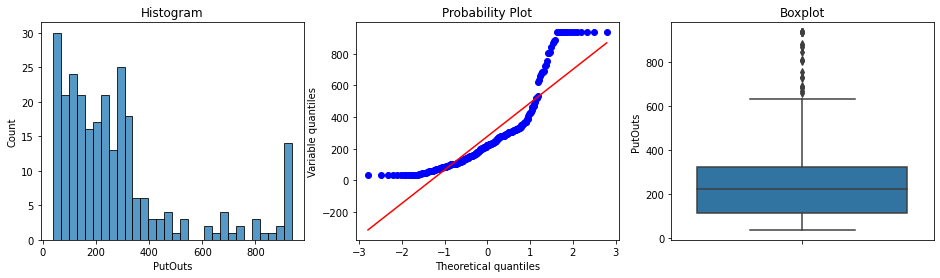

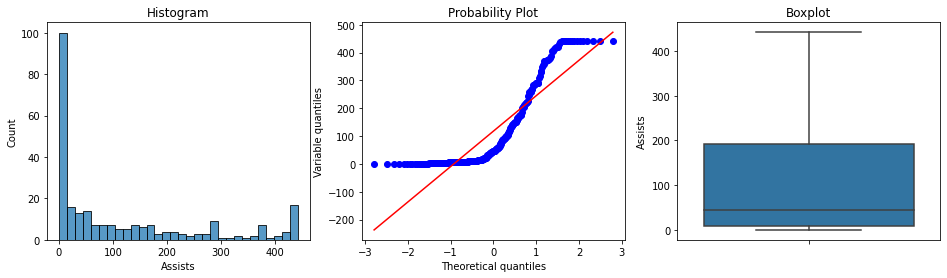

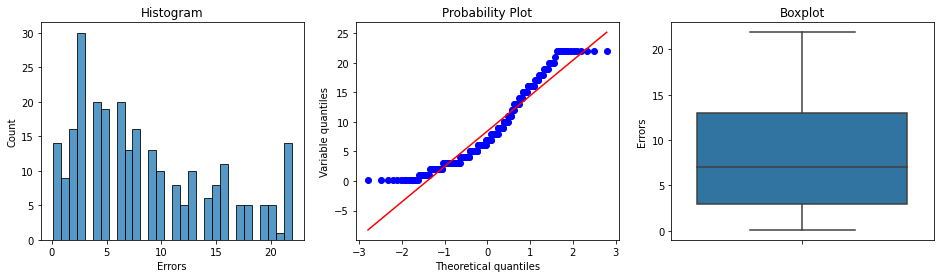

In [39]:
transformed_dataset = windsoriser.transform(dataset)

for feature in numerical_features:
    check_outliers(transformed_dataset, feature)

**So many outliers are capped with this technique.**

In [ ]:
outliers = ['HmRun', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']

## Categorical Features

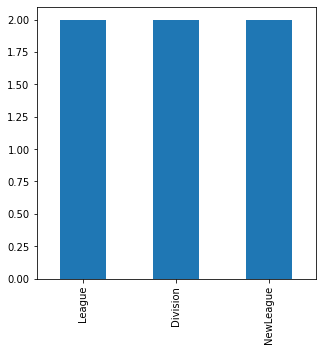

In [42]:
dataset[categorical_features].nunique().sort_values(ascending = False).plot.bar(figsize = (5, 5))

plt.show()

**Above plot shows, how many unique categories each feature has.**

### Plotting Salary based on the above categorical features

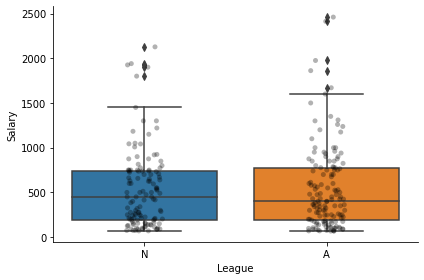

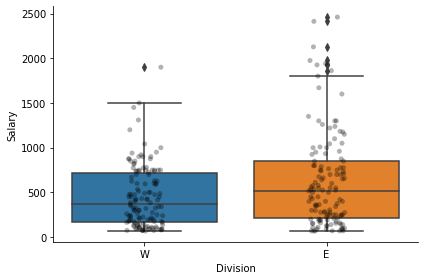

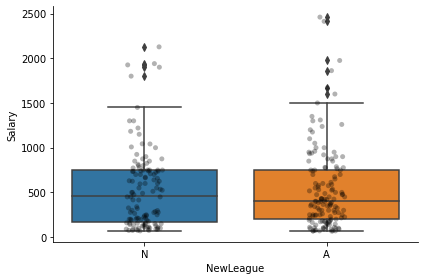

In [43]:
for feature in categorical_features:
    sns.catplot(x = feature, y = 'Salary', data = dataset, kind = 'box', height = 4, aspect = 1.5)
    sns.stripplot(x = feature, y = 'Salary', data = dataset, jitter = 0.1, alpha = 0.3, color = 'k')
    
    plt.show()
    

**As we can clearly see that, salaries are very similary or almost same in the current Leauge and NewLeague.**